In [27]:
import kagglehub
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, ElasticNet
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc, f1_score
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, LSTM
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1, l2, l1_l2

# Statistical Analysis
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr, spearmanr, kendalltau
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set advanced plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
sns.set_style("whitegrid")

In [ ]:
# Download and loading dataset
path = kagglehub.dataset_download("mdsultanulislamovi/student-stress-monitoring-datasets")

stress_level_df = pd.read_csv(path + '/StressLevelDataset.csv')
# stress_dataset_df = pd.read_csv(path + '/Stress_Dataset.csv')

In [3]:
print(f"Dataset 1 shape: {stress_level_df.shape}")
# print(f"Dataset 2 shape: {stress_dataset_df.shape}")

print("\nDataset 1 columns:")
print(stress_level_df.columns.tolist())

# print("\nDataset 2 columns:")
# print(stress_dataset_df.columns.tolist())

Dataset 1 shape: (1100, 21)

Dataset 1 columns:
['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']


In [4]:
def assess_data_quality(df, name):
    print(f"\n{name} Quality Assessment:")
    print(f"Missing values: {df.isnull().sum().sum()}")
    print(f"Duplicates: {df.duplicated().sum()}")
    print(f"Data types: {df.dtypes.value_counts().to_dict()}")
    return df.isnull().sum(), df.duplicated().sum()

missing_1, dup_1 = assess_data_quality(stress_level_df, "StressLevelDataset")
# missing_2, dup_2 = assess_data_quality(stress_dataset_df, "Stress_Dataset")


StressLevelDataset Quality Assessment:
Missing values: 0
Duplicates: 0
Data types: {dtype('int64'): 21}


In [ ]:
stress_level_clean = stress_level_df.copy().drop_duplicates()
print(f"Dataset after cleaning: {stress_level_clean.shape}")


Dataset after cleaning: (1100, 21)


In [ ]:
stress_level_clean.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


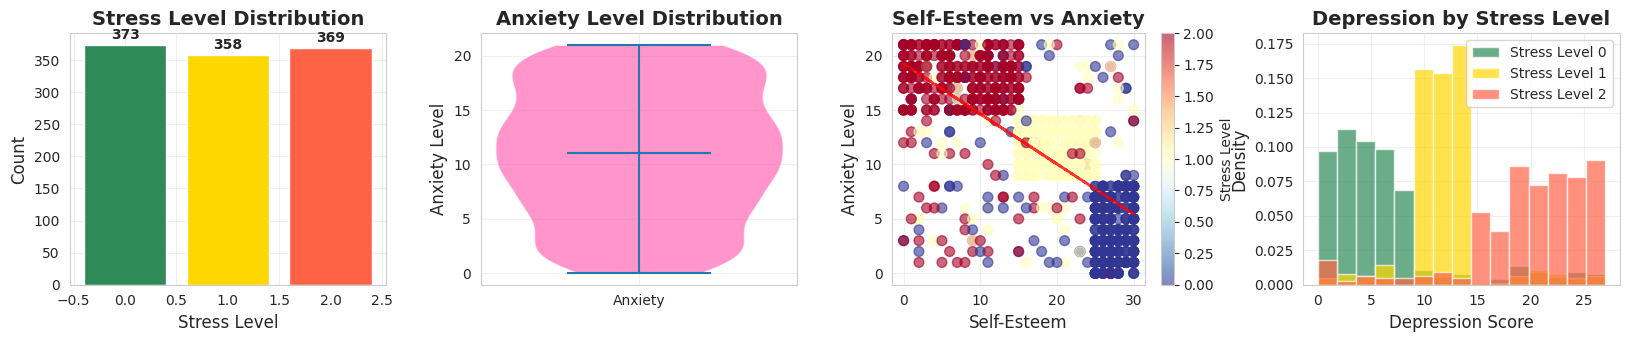

In [30]:
fig = plt.figure(figsize=(20, 16))
gs = GridSpec(4, 4, figure=fig, hspace=0.3, wspace=0.3)

# Dataset 1 stress level distribution with enhanced styling
ax1 = fig.add_subplot(gs[0, 0])
stress_dist = stress_level_clean['stress_level'].value_counts().sort_index()
colors_stress = ['#2E8B57', '#FFD700', '#FF6347']
bars = ax1.bar(stress_dist.index, stress_dist.values, color=colors_stress[:len(stress_dist)])
ax1.set_title('Stress Level Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Stress Level', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
for bar, val in zip(bars, stress_dist.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             str(val), ha='center', va='bottom', fontweight='bold')


ax2 = fig.add_subplot(gs[0, 1])
parts = ax2.violinplot([stress_level_clean['anxiety_level']], positions=[1], showmeans=True)
parts['bodies'][0].set_facecolor('#FF69B4')
parts['bodies'][0].set_alpha(0.7)
ax2.set_title('Anxiety Level Distribution', fontsize=14, fontweight='bold')
ax2.set_ylabel('Anxiety Level', fontsize=12)
ax2.set_xticks([1])
ax2.set_xticklabels(['Anxiety'])


# Self-esteem vs Anxiety scatter with regression line
ax3 = fig.add_subplot(gs[0, 2])
x = stress_level_clean['self_esteem']
y = stress_level_clean['anxiety_level']
scatter = ax3.scatter(x, y, c=stress_level_clean['stress_level'], 
                     cmap='RdYlBu_r', alpha=0.6, s=50)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax3.plot(x, p(x), "r--", alpha=0.8, linewidth=2)
ax3.set_title('Self-Esteem vs Anxiety', fontsize=14, fontweight='bold')
ax3.set_xlabel('Self-Esteem', fontsize=12)
ax3.set_ylabel('Anxiety Level', fontsize=12)
plt.colorbar(scatter, ax=ax3, label='Stress Level')

# Depression distribution by stress level
ax4 = fig.add_subplot(gs[0, 3])
for i, level in enumerate(sorted(stress_level_clean['stress_level'].unique())):
    subset = stress_level_clean[stress_level_clean['stress_level'] == level]['depression']
    ax4.hist(subset, alpha=0.7, label=f'Stress Level {level}', 
             color=colors_stress[i], bins=15, density=True)
ax4.set_title('Depression by Stress Level', fontsize=14, fontweight='bold')
ax4.set_xlabel('Depression Score', fontsize=12)
ax4.set_ylabel('Density', fontsize=12)
ax4.legend()

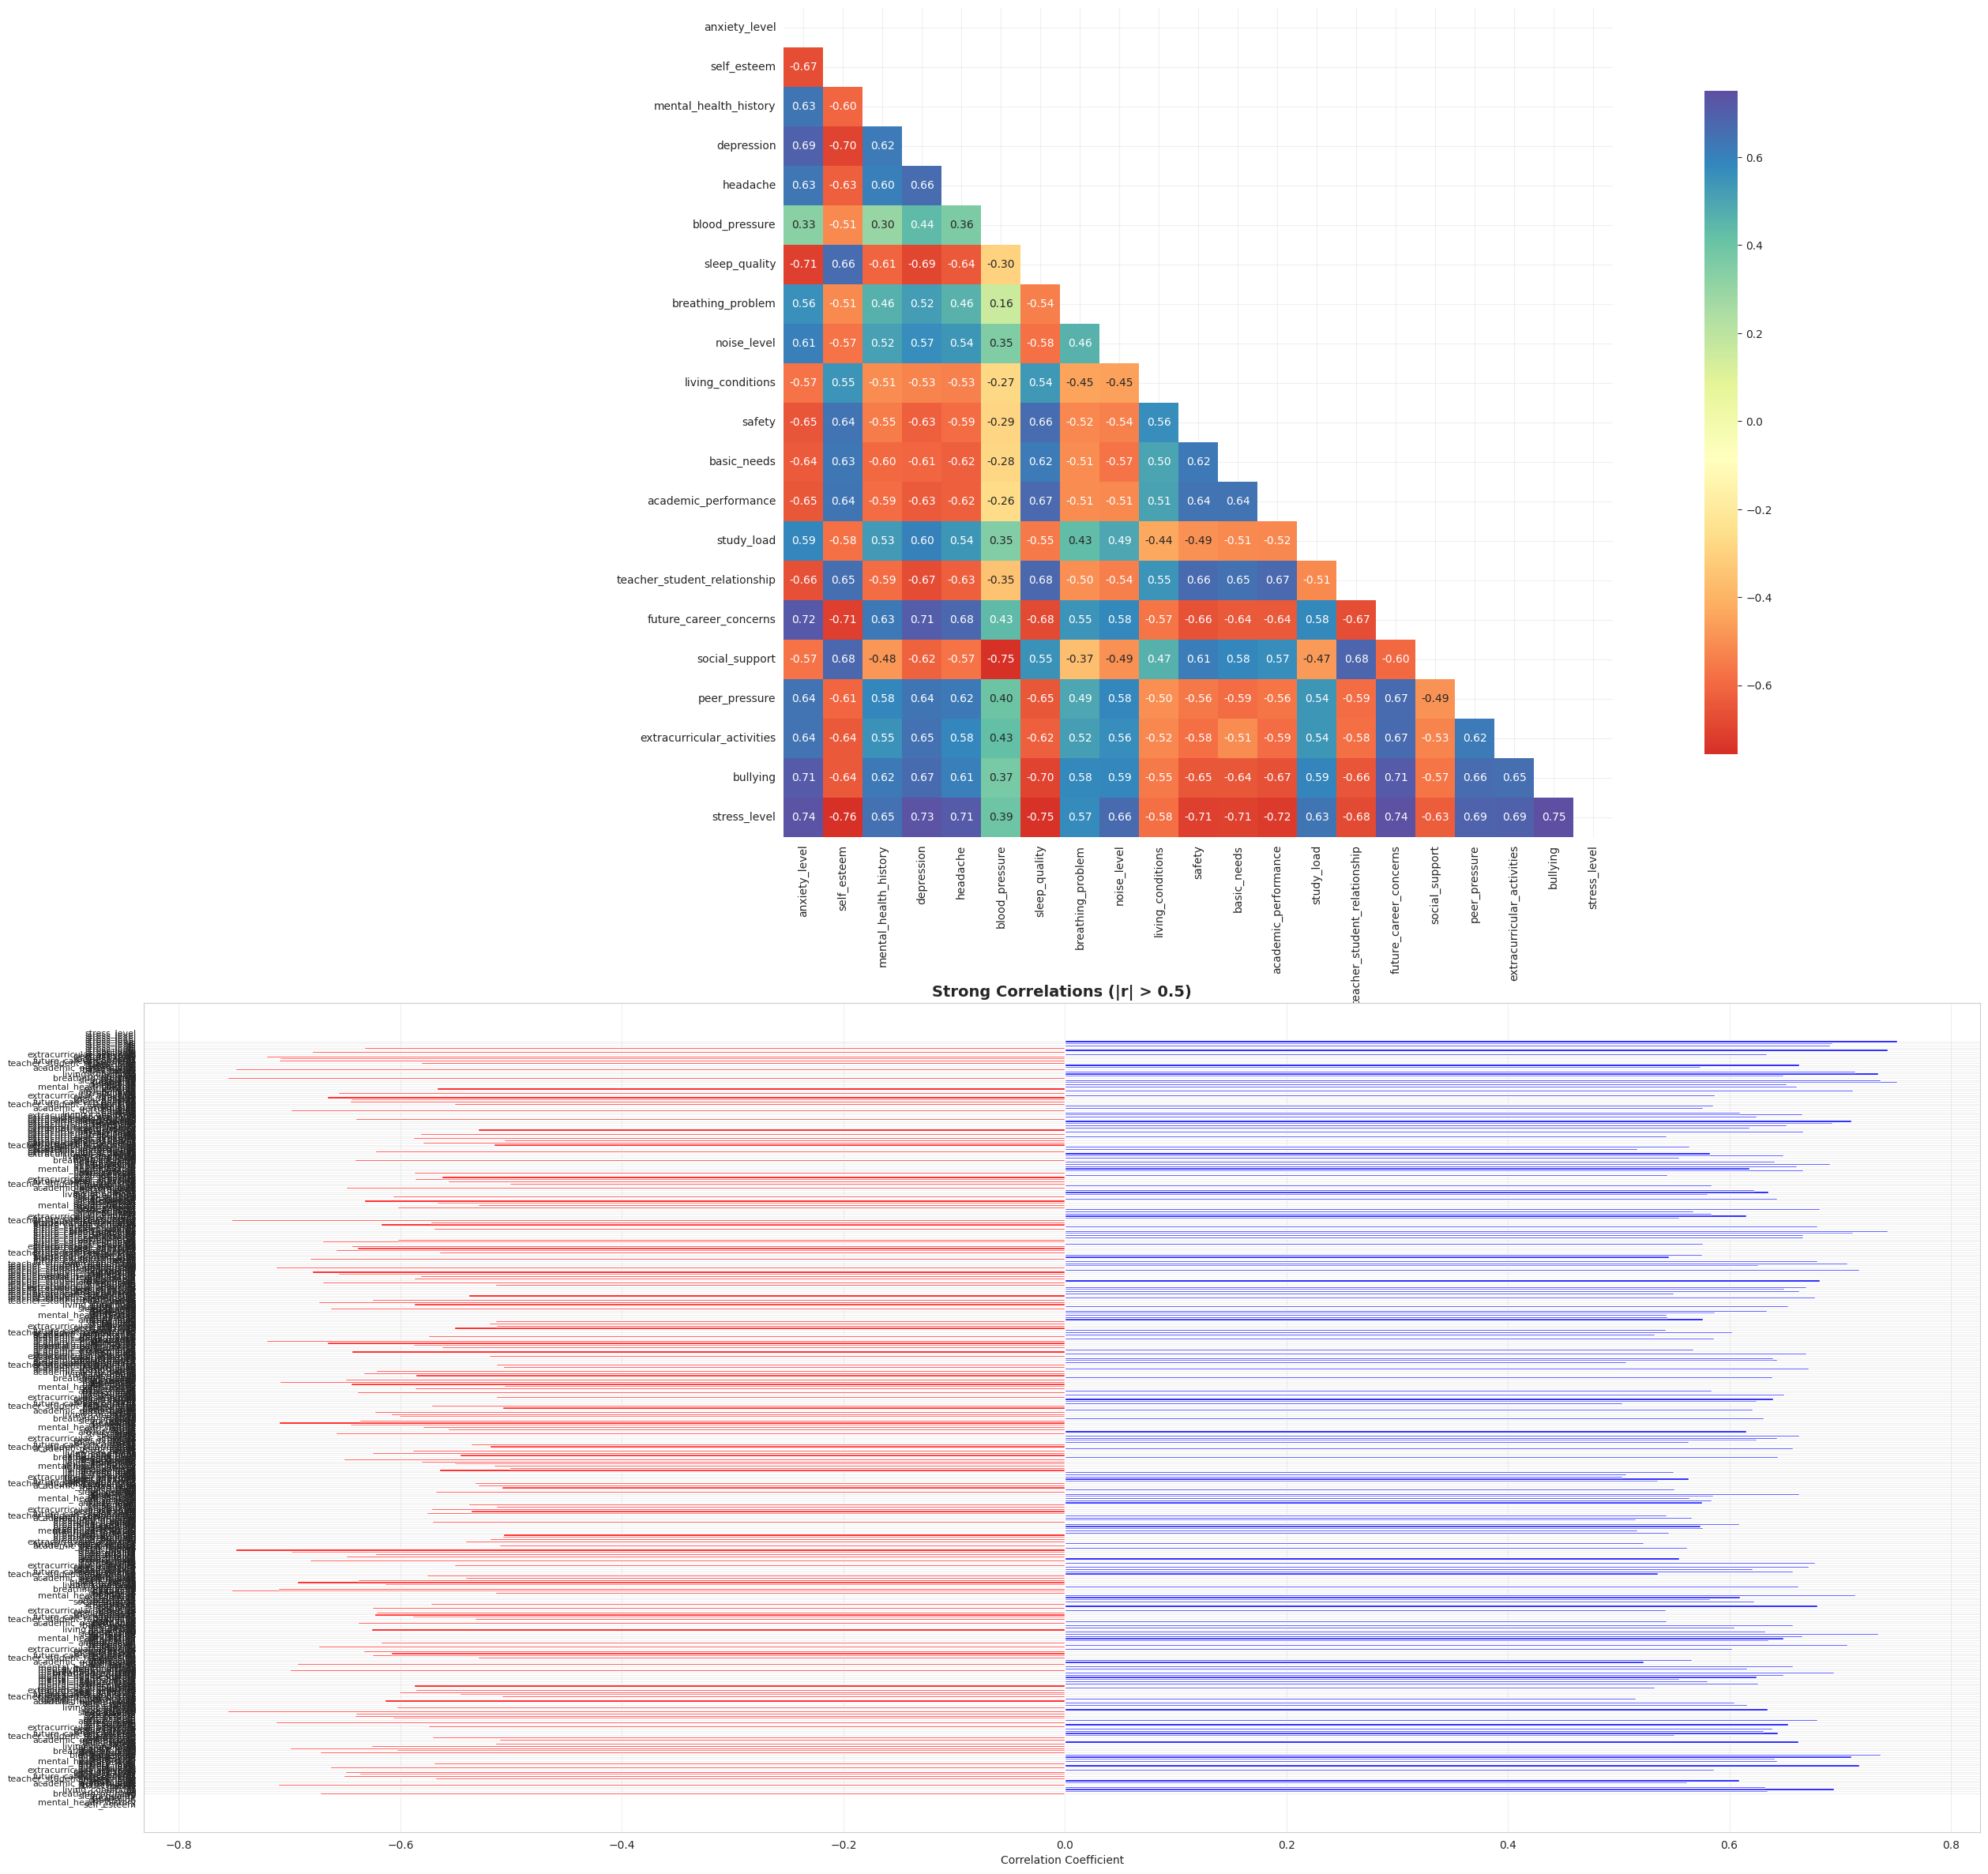

In [29]:
# 2. Advanced Correlation Analysis
fig, axes = plt.subplots(2, 1, figsize=(30, 30))

# Dataset 1 correlation matrix
numeric_cols_1 = stress_level_clean.select_dtypes(include=[np.number]).columns
corr_matrix_1 = stress_level_clean[numeric_cols_1].corr()

# Create custom colormap
colors = ['#d73027', '#f46d43', '#fdae61', '#fee08b', '#ffffbf', 
          '#e6f598', '#abdda4', '#66c2a5', '#3288bd', '#5e4fa2']
n_bins = 256
cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

mask = np.triu(np.ones_like(corr_matrix_1, dtype=bool))
sns.heatmap(corr_matrix_1, mask=mask, annot=True, cmap=cmap, center=0,
           square=True, fmt='.2f', ax=axes[0], cbar_kws={'shrink': 0.8})
axes[1].set_title('Dataset 1: Feature Correlation Matrix', fontsize=14, fontweight='bold')

# Strong correlations
strong_corr = corr_matrix_1.where(np.abs(corr_matrix_1) > 0.5).stack().reset_index()
strong_corr.columns = ['Feature1', 'Feature2', 'Correlation']
strong_corr = strong_corr[strong_corr['Feature1'] != strong_corr['Feature2']].dropna()

if not strong_corr.empty:
    axes[1].barh(range(len(strong_corr)), strong_corr['Correlation'], 
                   color=['red' if x < 0 else 'blue' for x in strong_corr['Correlation']])
    axes[1].set_yticks(range(len(strong_corr)))
    axes[1].set_yticklabels([f"{row['Feature1']}\nvs\n{row['Feature2']}" 
                              for _, row in strong_corr.iterrows()], fontsize=8)
    axes[1].set_title('Strong Correlations (|r| > 0.5)', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Correlation Coefficient')


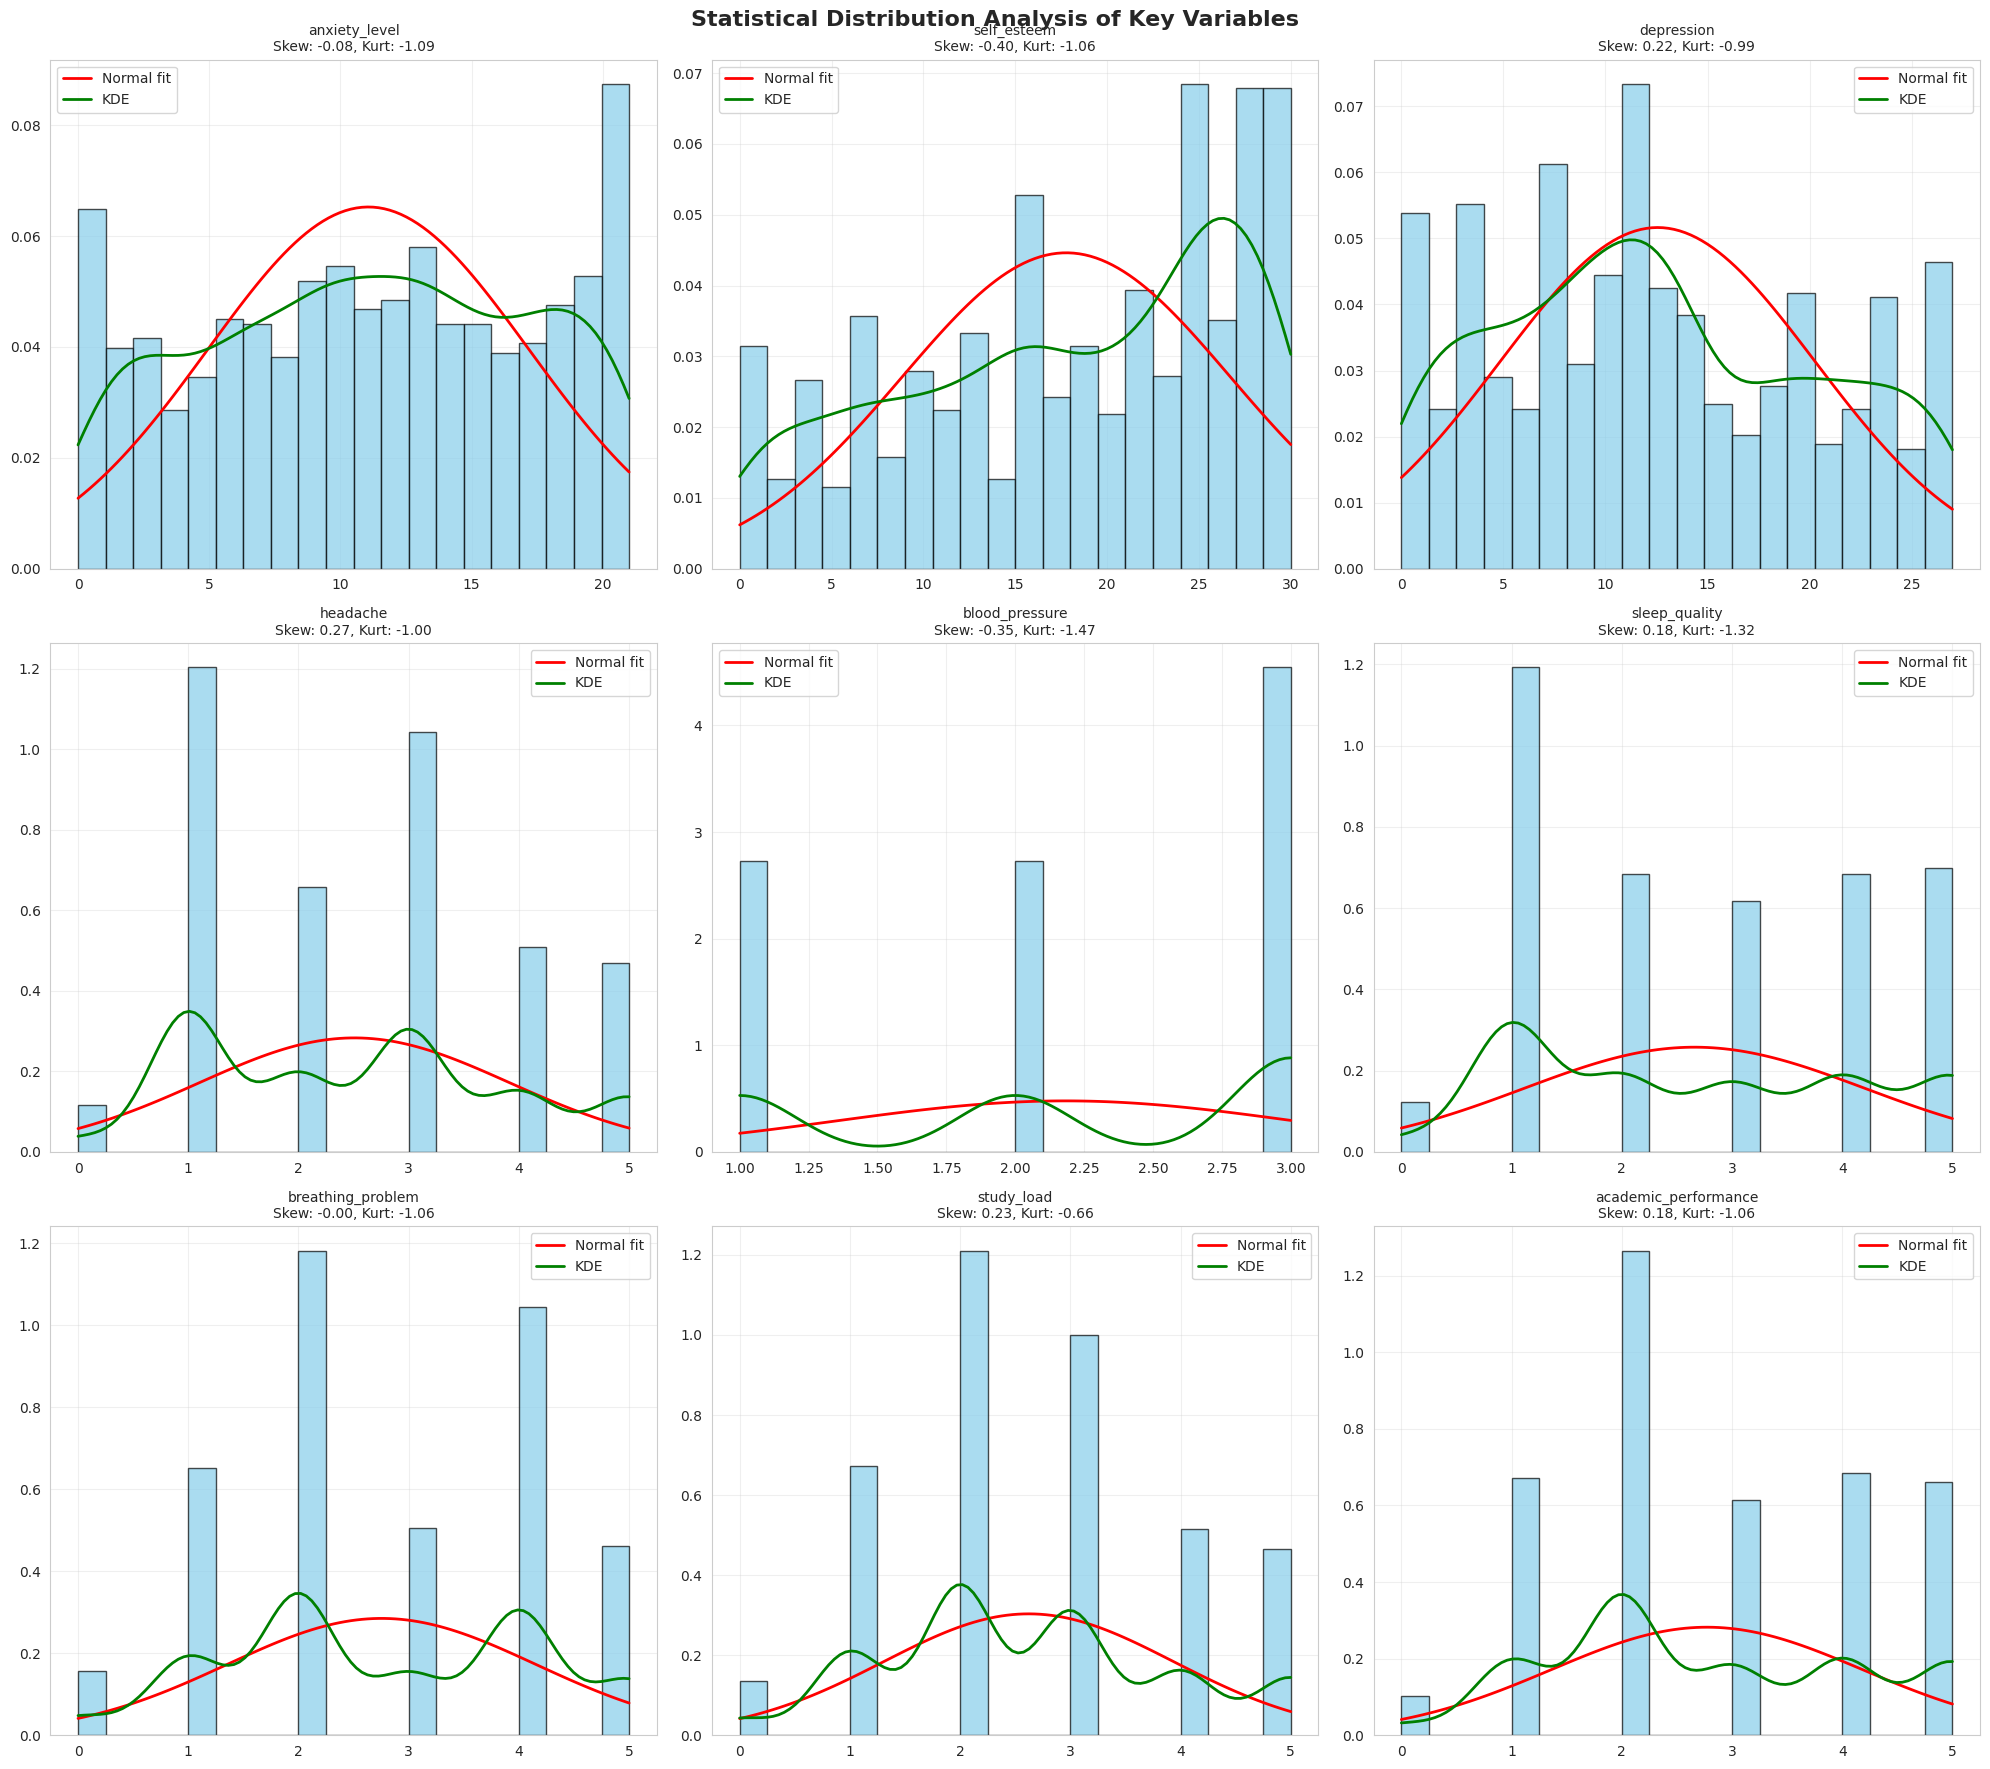

In [28]:
# 3. Statistical Distribution Analysis
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes = axes.ravel()

# Plot distributions of key variables
key_vars_1 = ['anxiety_level', 'self_esteem', 'depression', 'headache', 'blood_pressure', 
              'sleep_quality', 'breathing_problem', 'study_load', 'academic_performance']

for i, var in enumerate(key_vars_1):
    if var in stress_level_clean.columns:
        # Histogram with KDE
        axes[i].hist(stress_level_clean[var], bins=20, alpha=0.7, density=True, 
                    color='skyblue', edgecolor='black')
        
        # Fit and plot normal distribution
        mu, sigma = stats.norm.fit(stress_level_clean[var])
        x = np.linspace(stress_level_clean[var].min(), stress_level_clean[var].max(), 100)
        axes[i].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal fit')
        
        # KDE
        try:
            from scipy.stats import gaussian_kde
            kde = gaussian_kde(stress_level_clean[var].dropna())
            axes[i].plot(x, kde(x), 'g-', linewidth=2, label='KDE')
        except:
            pass
        
        # Statistics
        skew = stats.skew(stress_level_clean[var])
        kurt = stats.kurtosis(stress_level_clean[var])
        
        axes[i].set_title(f'{var}\nSkew: {skew:.2f}, Kurt: {kurt:.2f}', fontsize=10)
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

plt.suptitle('Statistical Distribution Analysis of Key Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


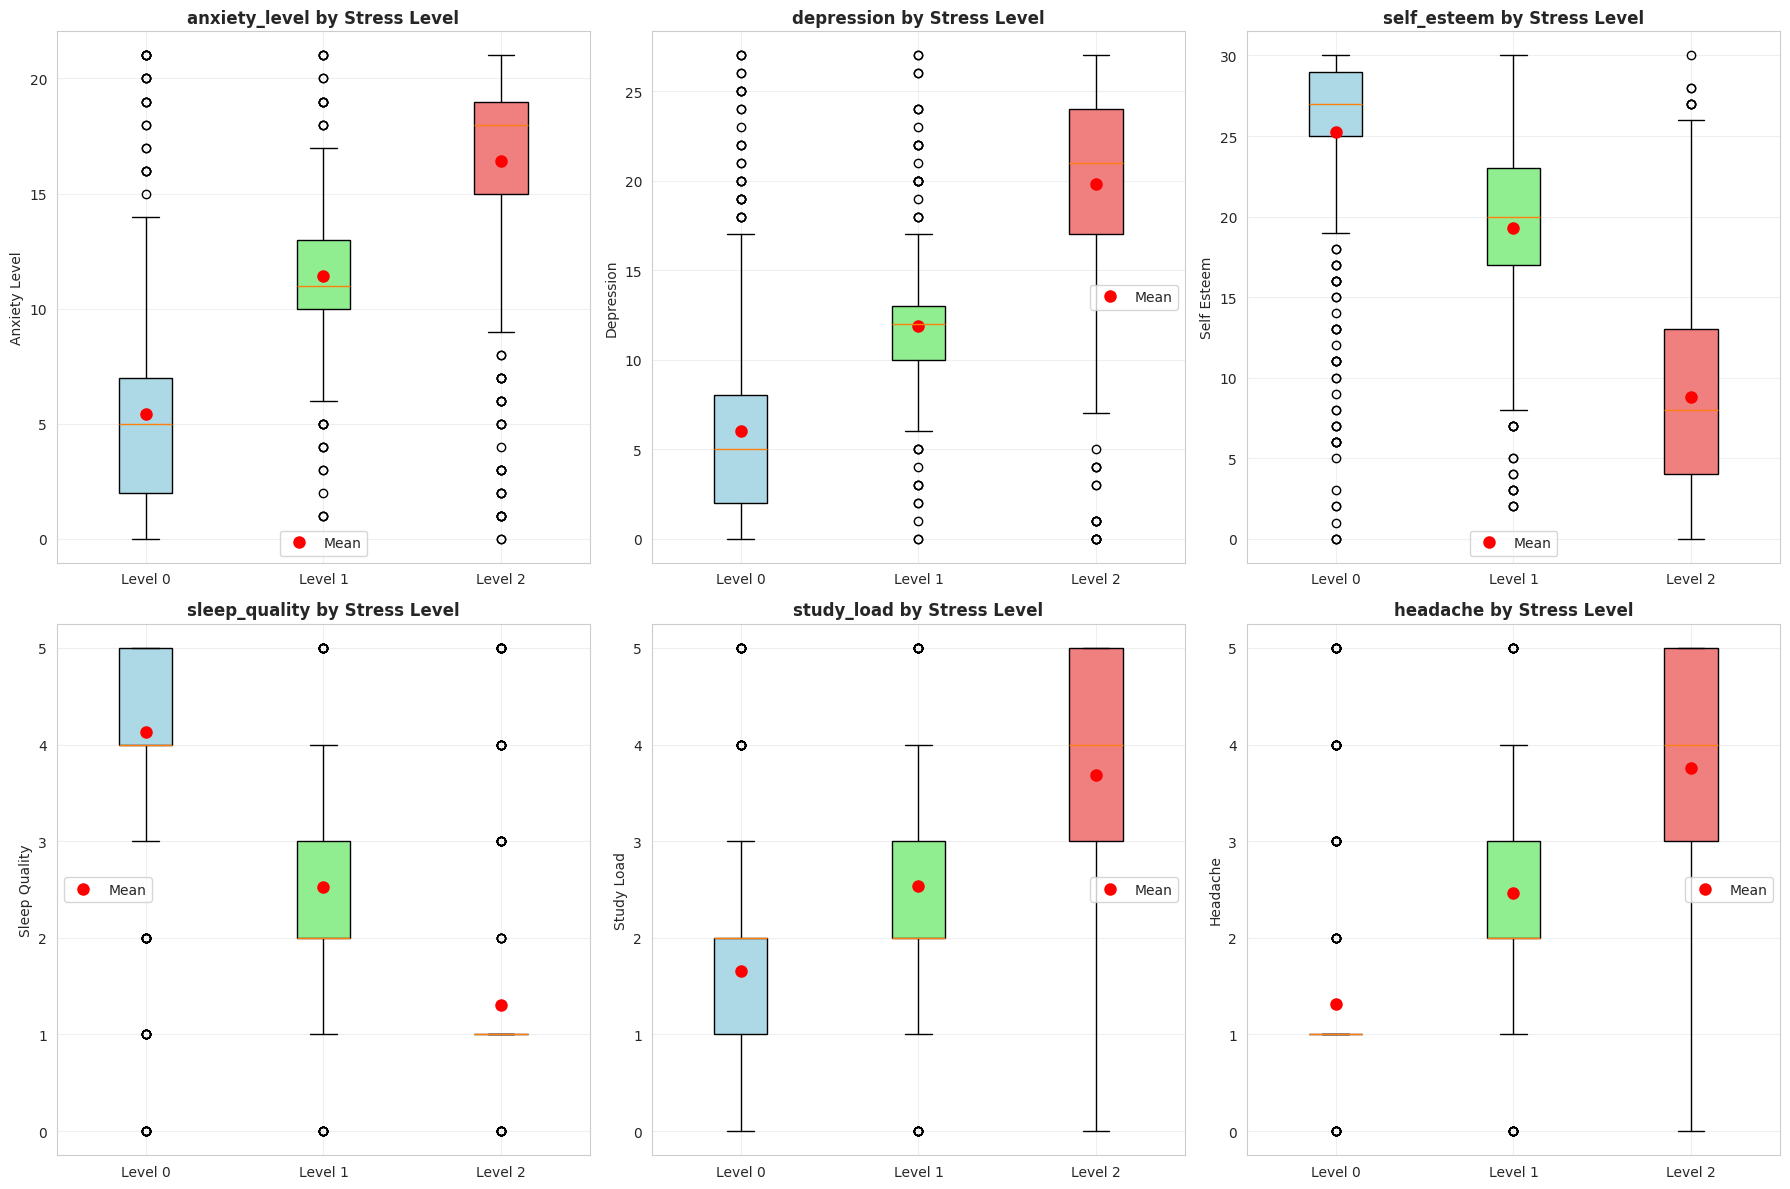

In [31]:
# 4. Advanced Box Plot Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Box plots by stress level
box_vars = ['anxiety_level', 'depression', 'self_esteem', 'sleep_quality', 'study_load', 'headache']
for i, var in enumerate(box_vars):
    ax = axes[i//3, i%3]
    if var in stress_level_clean.columns:
        box_data = [stress_level_clean[stress_level_clean['stress_level'] == level][var].dropna() 
                   for level in sorted(stress_level_clean['stress_level'].unique())]
        
        bp = ax.boxplot(box_data, patch_artist=True, 
                       labels=[f'Level {i}' for i in sorted(stress_level_clean['stress_level'].unique())])
        
        colors = ['lightblue', 'lightgreen', 'lightcoral']
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
        
        # Add mean markers
        means = [np.mean(data) for data in box_data]
        ax.plot(range(1, len(means)+1), means, 'ro', markersize=8, label='Mean')
        
        ax.set_title(f'{var} by Stress Level', fontsize=12, fontweight='bold')
        ax.set_ylabel(var.replace('_', ' ').title())
        ax.grid(True, alpha=0.3)
        ax.legend()

plt.tight_layout()
plt.show()


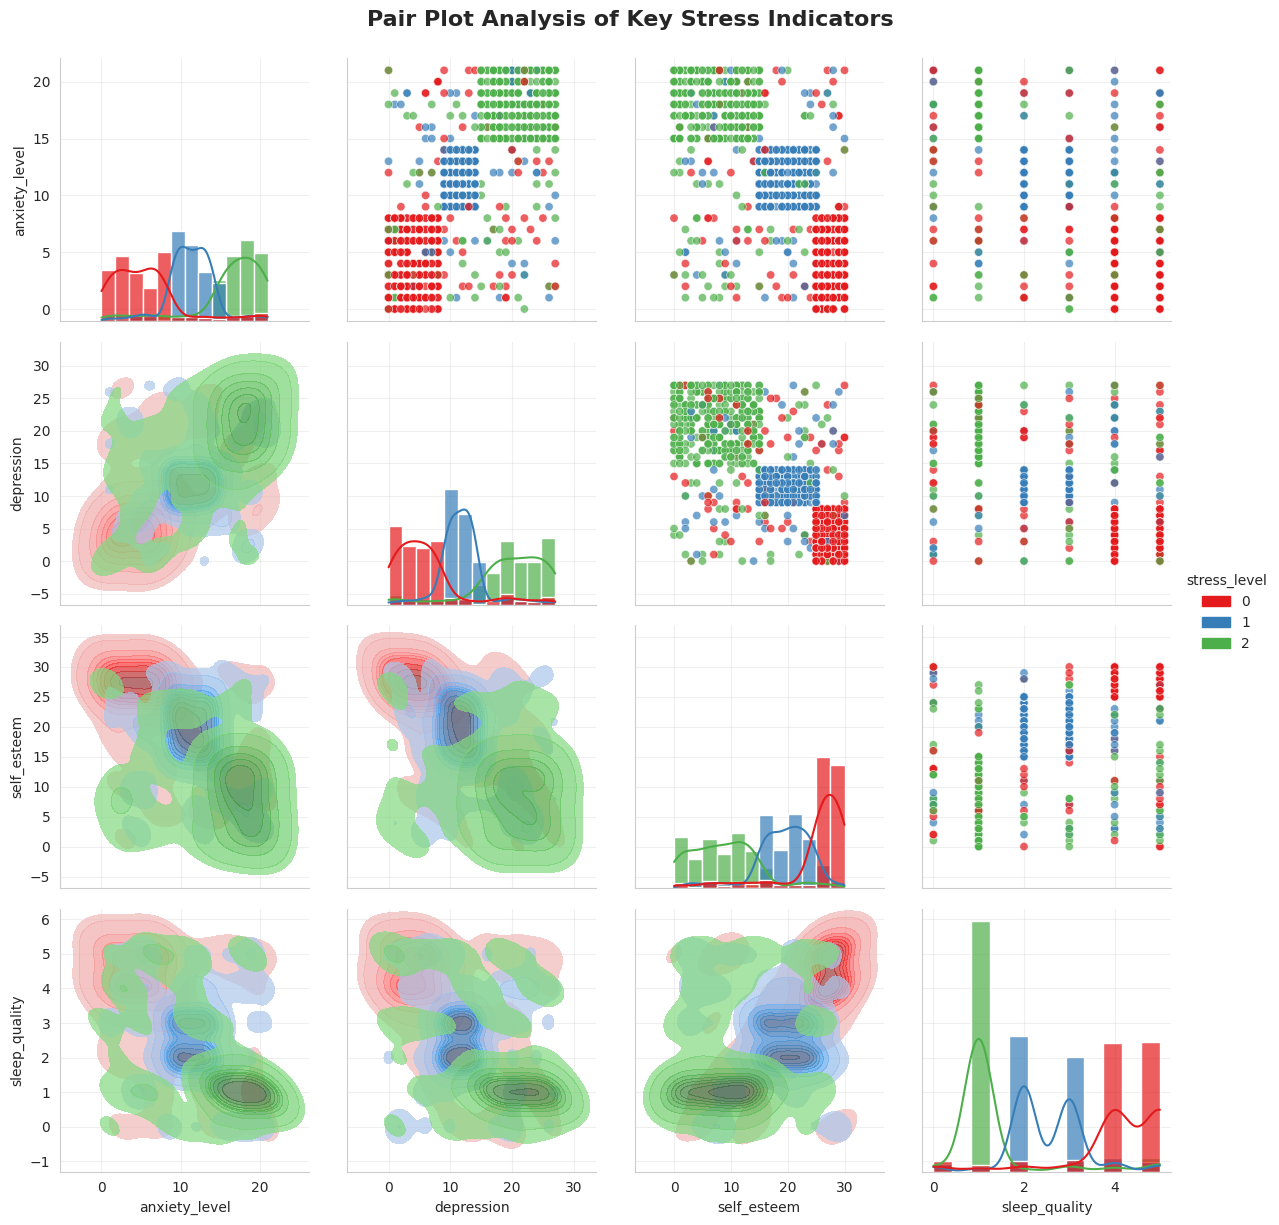

In [32]:
# 5. Pair Plot Analysis
key_features = ['anxiety_level', 'depression', 'self_esteem', 'sleep_quality']
if all(col in stress_level_clean.columns for col in key_features):
    g = sns.PairGrid(stress_level_clean[key_features + ['stress_level']], 
                     hue='stress_level', palette='Set1', height=3)
    g.map_upper(sns.scatterplot, alpha=0.7)
    g.map_lower(sns.kdeplot, fill=True, alpha=0.7)
    g.map_diag(sns.histplot, kde=True, alpha=0.7)
    g.add_legend()
    plt.suptitle('Pair Plot Analysis of Key Stress Indicators', fontsize=16, fontweight='bold', y=1.02)
    plt.show()

In [33]:
# STEP 4: FEATURE ENGINEERING
print("\nSTEP 4: Advanced Feature Engineering")
print("-" * 60)

# Dataset 1 Feature Engineering
stress_level_eng = stress_level_clean.copy()

# Composite scores
stress_level_eng['mental_health_score'] = (
    stress_level_eng['anxiety_level'] + stress_level_eng['depression']
) / 2

stress_level_eng['physical_health_score'] = (
    stress_level_eng['headache'] + stress_level_eng['blood_pressure'] + 
    stress_level_eng['breathing_problem']
) / 3

stress_level_eng['academic_pressure_score'] = (
    stress_level_eng['study_load'] + stress_level_eng['academic_performance'] + 
    stress_level_eng['future_career_concerns']
) / 3

stress_level_eng['social_pressure_score'] = (
    stress_level_eng['peer_pressure'] + stress_level_eng['bullying']
) / 2

# Interaction terms
stress_level_eng['anxiety_depression_interaction'] = (
    stress_level_eng['anxiety_level'] * stress_level_eng['depression']
)

stress_level_eng['self_esteem_anxiety_ratio'] = (
    stress_level_eng['self_esteem'] / (stress_level_eng['anxiety_level'] + 1)
)

# Polynomial features
stress_level_eng['anxiety_squared'] = stress_level_eng['anxiety_level'] ** 2
stress_level_eng['self_esteem_squared'] = stress_level_eng['self_esteem'] ** 2

# Binning
stress_level_eng['anxiety_category'] = pd.cut(
    stress_level_eng['anxiety_level'], bins=[0, 7, 14, 21], 
    labels=['Low', 'Medium', 'High']
)

stress_level_eng['self_esteem_category'] = pd.cut(
    stress_level_eng['self_esteem'], bins=[0, 10, 20, 30], 
    labels=['Low', 'Medium', 'High']
)


STEP 4: Advanced Feature Engineering
------------------------------------------------------------


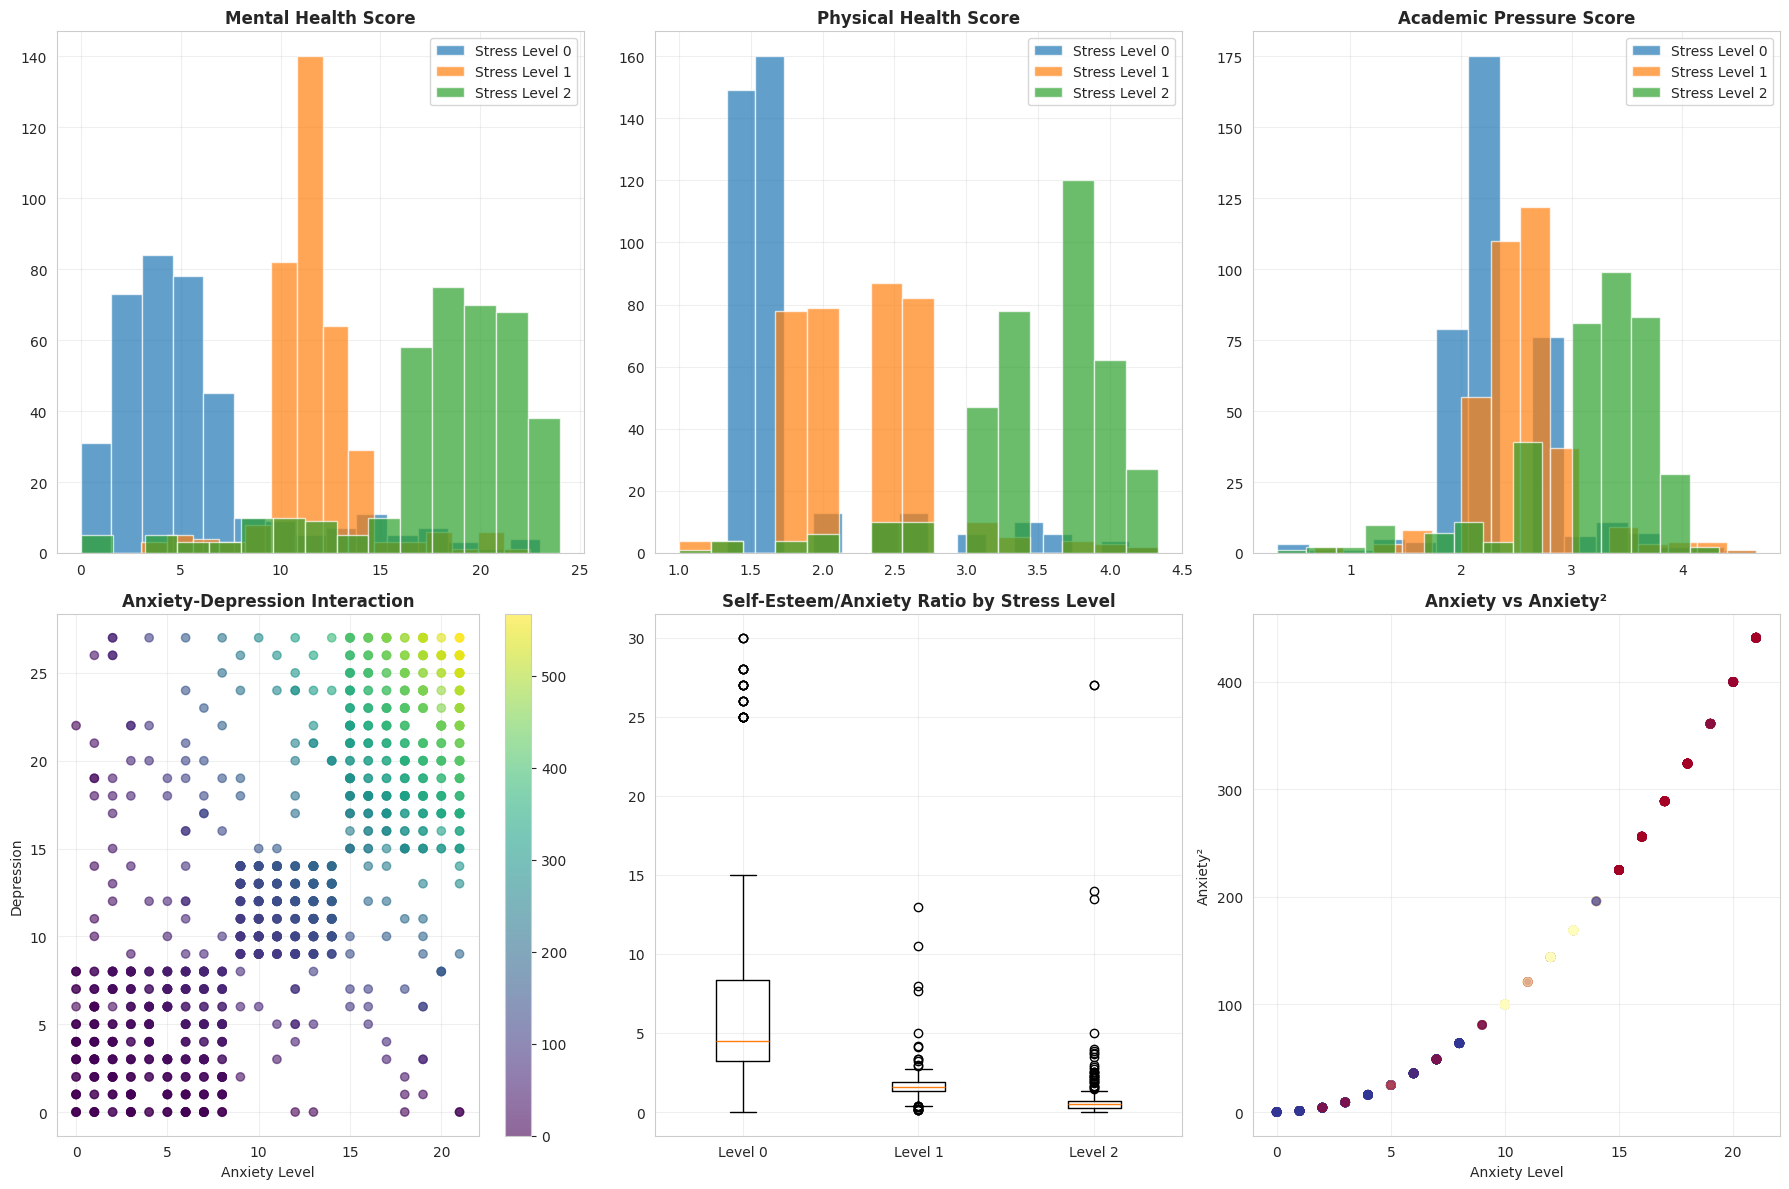

In [34]:
# 6. Feature Engineering Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Composite scores distribution
composite_scores = ['mental_health_score', 'physical_health_score', 'academic_pressure_score']
for i, score in enumerate(composite_scores):
    if score in stress_level_eng.columns:
        for level in sorted(stress_level_eng['stress_level'].unique()):
            subset = stress_level_eng[stress_level_eng['stress_level'] == level][score]
            axes[0, i].hist(subset, alpha=0.7, label=f'Stress Level {level}', bins=15)
        axes[0, i].set_title(f'{score.replace("_", " ").title()}', fontsize=12, fontweight='bold')
        axes[0, i].legend()
        axes[0, i].grid(True, alpha=0.3)

# Interaction terms visualization
if 'anxiety_depression_interaction' in stress_level_eng.columns:
    scatter = axes[1, 0].scatter(stress_level_eng['anxiety_level'], 
                                stress_level_eng['depression'],
                                c=stress_level_eng['anxiety_depression_interaction'],
                                cmap='viridis', alpha=0.6)
    axes[1, 0].set_title('Anxiety-Depression Interaction', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Anxiety Level')
    axes[1, 0].set_ylabel('Depression')
    plt.colorbar(scatter, ax=axes[1, 0])

# Self-esteem anxiety ratio
if 'self_esteem_anxiety_ratio' in stress_level_eng.columns:
    axes[1, 1].boxplot([stress_level_eng[stress_level_eng['stress_level'] == level]['self_esteem_anxiety_ratio'].dropna() 
                       for level in sorted(stress_level_eng['stress_level'].unique())])
    axes[1, 1].set_title('Self-Esteem/Anxiety Ratio by Stress Level', fontsize=12, fontweight='bold')
    axes[1, 1].set_xticklabels([f'Level {i}' for i in sorted(stress_level_eng['stress_level'].unique())])

# Polynomial features
if 'anxiety_squared' in stress_level_eng.columns:
    axes[1, 2].scatter(stress_level_eng['anxiety_level'], stress_level_eng['anxiety_squared'],
                      c=stress_level_eng['stress_level'], cmap='RdYlBu_r', alpha=0.6)
    axes[1, 2].set_title('Anxiety vs Anxiety²', fontsize=12, fontweight='bold')
    axes[1, 2].set_xlabel('Anxiety Level')
    axes[1, 2].set_ylabel('Anxiety²')

plt.tight_layout()
plt.show() 


In [35]:
# Prepare Dataset 1
X1 = stress_level_eng.select_dtypes(include=[np.number]).drop(['stress_level'], axis=1)
y1 = stress_level_eng['stress_level']
X1 = X1.fillna(X1.mean())

print(f"Dataset 1 - Features: {X1.shape[1]}, Samples: {X1.shape[0]}")

Dataset 1 - Features: 28, Samples: 1100


In [36]:
def evaluate_comprehensive_models(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                        random_state=42, stratify=y)
    
    # Multiple scalers
    scalers = {
        'StandardScaler': StandardScaler(),
        'MinMaxScaler': MinMaxScaler(),
        'RobustScaler': RobustScaler()
    }
    
    # Comprehensive model suite
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=300, random_state=42),
        'Extra Trees': ExtraTreesClassifier(n_estimators=300, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, random_state=42),
        'AdaBoost': AdaBoostClassifier(n_estimators=200, random_state=42),
        'Bagging': BaggingClassifier(n_estimators=100, random_state=42),
        'SVM RBF': SVC(kernel='rbf', random_state=42, probability=True),
        'SVM Poly': SVC(kernel='poly', random_state=42, probability=True),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=2000),
        'Ridge Classifier': RidgeClassifier(random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=7),
        'KNN Weighted': KNeighborsClassifier(n_neighbors=7, weights='distance'),
        'Naive Bayes': GaussianNB(),
        'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
        'LDA': LinearDiscriminantAnalysis(),
        'QDA': QuadraticDiscriminantAnalysis(),
        'Neural Network': MLPClassifier(hidden_layer_sizes=(200, 100, 50), 
                                      random_state=42, max_iter=1000)
    }
    
    results = {}
    best_scaler = 'StandardScaler'
    
    # Find best scaler using Random Forest
    scaler_scores = {}
    for scaler_name, scaler in scalers.items():
        X_scaled = scaler.fit_transform(X_train)
        rf_temp = RandomForestClassifier(n_estimators=100, random_state=42)
        cv_score = cross_val_score(rf_temp, X_scaled, y_train, cv=5, scoring='accuracy').mean()
        scaler_scores[scaler_name] = cv_score
    
    best_scaler = max(scaler_scores.keys(), key=lambda k: scaler_scores[k])
    print(f"Best scaler for {dataset_name}: {best_scaler}")
    
    # Scale data with best scaler
    scaler = scalers[best_scaler]
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"\nEvaluating {dataset_name} with {len(models)} models:")
    print("-" * 40)
    
    for name, model in models.items():
        try:
            # Cross-validation
            cv_scores = cross_val_score(model, X_train_scaled, y_train, 
                                      cv=5, scoring='accuracy')
            
            # Fit and predict
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            y_pred_proba = None
            
            if hasattr(model, 'predict_proba'):
                y_pred_proba = model.predict_proba(X_test_scaled)
            
            # Metrics
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            
            results[name] = {
                'cv_mean': cv_scores.mean(),
                'cv_std': cv_scores.std(),
                'test_accuracy': accuracy,
                'test_f1': f1,
                'model': model,
                'predictions': y_pred,
                'probabilities': y_pred_proba
            }
            
            print(f"{name:20} CV: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f}) "
                  f"Test Acc: {accuracy:.4f} F1: {f1:.4f}")
                  
        except Exception as e:
            print(f"{name:20} Error: {str(e)}")
    
    return results, scaler, X_test_scaled, y_test, X_test

# Evaluate both datasets
results1, scaler1, X1_test_scaled, y1_test, X1_test = evaluate_comprehensive_models(X1, y1, "Dataset 1")

Best scaler for Dataset 1: MinMaxScaler

Evaluating Dataset 1 with 16 models:
----------------------------------------
Random Forest        CV: 0.8795 (+/- 0.0490) Test Acc: 0.8909 F1: 0.8908
Extra Trees          CV: 0.8795 (+/- 0.0581) Test Acc: 0.9000 F1: 0.9001
Gradient Boosting    CV: 0.8909 (+/- 0.0428) Test Acc: 0.8864 F1: 0.8863
AdaBoost             CV: 0.8591 (+/- 0.0644) Test Acc: 0.8773 F1: 0.8775
Bagging              CV: 0.8739 (+/- 0.0390) Test Acc: 0.8955 F1: 0.8955
SVM RBF              CV: 0.8705 (+/- 0.0554) Test Acc: 0.8864 F1: 0.8862
SVM Poly             CV: 0.8773 (+/- 0.0600) Test Acc: 0.8773 F1: 0.8767
Logistic Regression  CV: 0.8795 (+/- 0.0549) Test Acc: 0.8818 F1: 0.8818
Ridge Classifier     CV: 0.8773 (+/- 0.0649) Test Acc: 0.8864 F1: 0.8866
KNN                  CV: 0.8682 (+/- 0.0525) Test Acc: 0.8636 F1: 0.8634
KNN Weighted         CV: 0.8693 (+/- 0.0518) Test Acc: 0.8682 F1: 0.8675
Naive Bayes          CV: 0.8807 (+/- 0.0431) Test Acc: 0.8773 F1: 0.8783
Decis

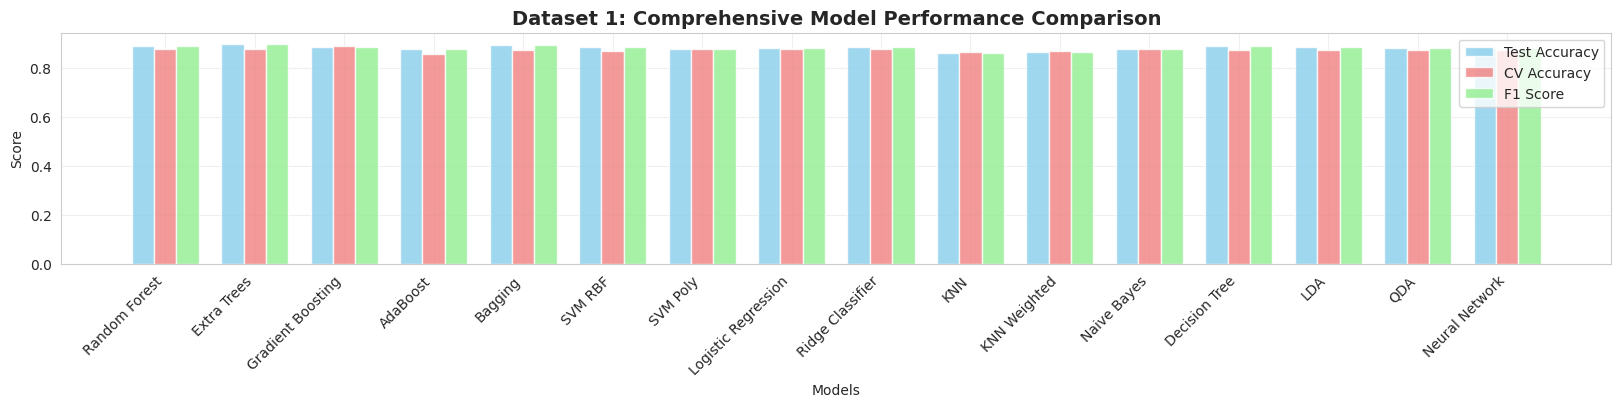

In [37]:
# 7. Model Performance Visualization Dashboard
fig = plt.figure(figsize=(20, 24))
gs = GridSpec(6, 3, figure=fig, hspace=0.4, wspace=0.3)

# Dataset 1 performance comparison
ax1 = fig.add_subplot(gs[0, :])
models1 = list(results1.keys())
test_scores1 = [results1[m]['test_accuracy'] for m in models1]
cv_scores1 = [results1[m]['cv_mean'] for m in models1]
f1_scores1 = [results1[m]['test_f1'] for m in models1]

x = np.arange(len(models1))
width = 0.25

bars1 = ax1.bar(x - width, test_scores1, width, label='Test Accuracy', alpha=0.8, color='skyblue')
bars2 = ax1.bar(x, cv_scores1, width, label='CV Accuracy', alpha=0.8, color='lightcoral')
bars3 = ax1.bar(x + width, f1_scores1, width, label='F1 Score', alpha=0.8, color='lightgreen')

ax1.set_xlabel('Models')
ax1.set_ylabel('Score')
ax1.set_title('Dataset 1: Comprehensive Model Performance Comparison', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(models1, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

In [40]:
# Best models comparison
ax3 = fig.add_subplot(gs[2, 0])
best_model = max(results1.keys(), key=lambda k: results1[k]['test_accuracy'])
best_acc = results1[best_model1]['test_accuracy']

print(best_model)
print(best_acc)

Extra Trees
0.9


In [51]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Re-instantiate the model with the same parameters for consistency
etc_model = ExtraTreesClassifier(n_estimators=300, random_state=42)


# Assuming X and y are your full feature and target data
# 1. Split 60% (train) / 40% (temp)
X_train, X_temp, y_train, y_temp = train_test_split(
    X1, y1, test_size=0.4, random_state=42, stratify=y1
)

# 2. Split 40% (temp) into 20% (val) / 20% (test)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# 3. Apply the Best Scaler (MinMaxScaler from your results)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [42]:
etc_model.fit(X_train_scaled, y_train)

ExtraTreesClassifier(n_estimators=300, random_state=42)

In [43]:
from sklearn.calibration import CalibratedClassifierCV

# Platt Scaling: method='sigmoid'
calibrated_platt = CalibratedClassifierCV(
    estimator=etc_model, 
    method='sigmoid', 
    cv='prefit' # Tells CalibratedClassifierCV that the base model is already trained
)

# Fit the Platt calibration curve using the Validation Set
calibrated_platt.fit(X_val_scaled, y_val)

CalibratedClassifierCV(cv='prefit',
                       estimator=ExtraTreesClassifier(n_estimators=300,
                                                      random_state=42))

In [44]:
# Isotonic Regression: method='isotonic'
calibrated_isotonic = CalibratedClassifierCV(
    estimator=etc_model, 
    method='isotonic', 
    cv='prefit'
)

# Fit the Isotonic calibration curve using the Validation Set
calibrated_isotonic.fit(X_val_scaled, y_val)

CalibratedClassifierCV(cv='prefit',
                       estimator=ExtraTreesClassifier(n_estimators=300,
                                                      random_state=42),
                       method='isotonic')

In [45]:
from sklearn.metrics import brier_score_loss, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)

def calculate_brier_auc(model, X_test, y_test_bin):
    """Helper to calculate Brier Score and AUC for multi-class problem."""
    probs = model.predict_proba(X_test)
    
    brier_scores = [
        brier_score_loss(y_test_bin[:, i], probs[:, i]) 
        for i in range(y_test_bin.shape[1])
    ]
    
    avg_brier = np.mean(brier_scores)
    avg_auc = roc_auc_score(y_test, probs, multi_class='ovr')
    return avg_brier, avg_auc, probs

# --- 1. Uncalibrated Baseline (Recalculated on the new Test Set) ---
brier_uncal, auc_uncal, probs_uncal = calculate_brier_auc(etc_model, X_test_scaled, y_test_binarized)

# --- 2. Platt Calibrated ---
brier_platt, auc_platt, probs_platt = calculate_brier_auc(calibrated_platt, X_test_scaled, y_test_binarized)

# --- 3. Isotonic Calibrated ---
brier_iso, auc_iso, probs_iso = calculate_brier_auc(calibrated_isotonic, X_test_scaled, y_test_binarized)

print(f"\n--- Brier Score Comparison (Test Set) ---")
print(f"Uncalibrated ETC: {brier_uncal:.4f}")
print(f"Platt-Calibrated: {brier_platt:.4f}")
print(f"Isotonic-Calibrated: {brier_iso:.4f}")

# The goal is: brier_platt < brier_uncal AND brier_iso < brier_uncal
# Note: The AUC should remain relatively stable, as calibration fixes probabilities, not the ranking (discrimination).


--- Brier Score Comparison (Test Set) ---
Uncalibrated ETC: 0.0441
Platt-Calibrated: 0.0479
Isotonic-Calibrated: 0.0488


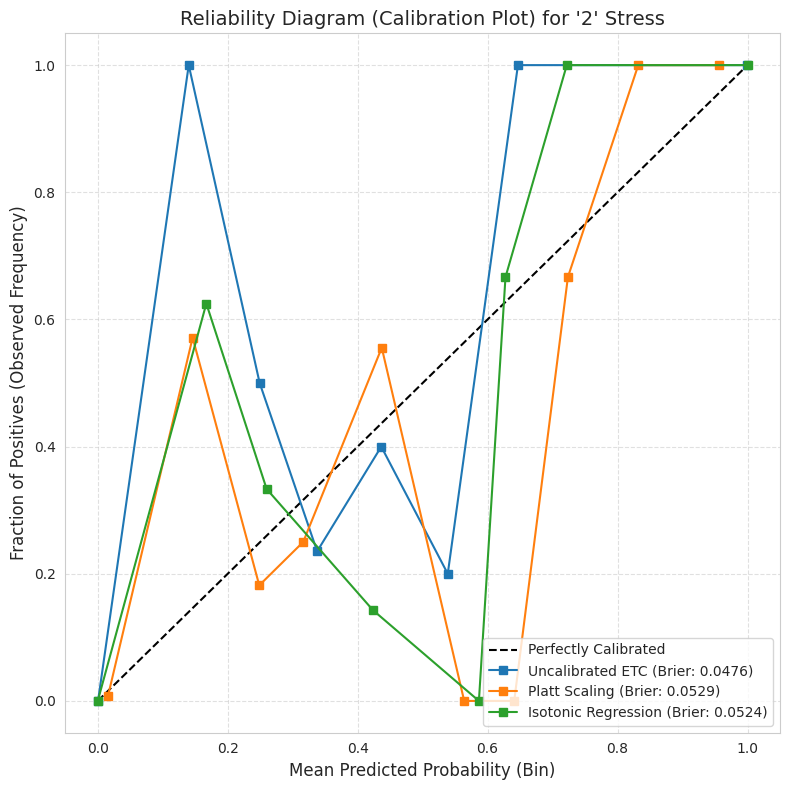

In [46]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming you have the following from Step 3:
# X_test_scaled, y_test (Test data)
# etc_model, calibrated_platt, calibrated_isotonic (Fitted models)

# --- 1. Define the Class of Interest for Visualization ---
# Select the class index you want to visualize (e.g., the last one, often 'High Stress')
classes = np.unique(y_test)
target_class_index = len(classes) - 1 # Index for the 'High' stress class
target_class_label = classes[target_class_index]

# Binarize the true labels for the target class (1 or 0)
y_test_target = (y_test == target_class_label).astype(int)

# --- 2. Define Models and Generate Probabilities for the Target Class ---
models = {
    "Uncalibrated ETC": etc_model,
    "Platt Scaling": calibrated_platt,
    "Isotonic Regression": calibrated_isotonic
}

model_probs = {}
for name, model in models.items():
    # Get probability for the target class
    probs = model.predict_proba(X_test_scaled)[:, target_class_index]
    model_probs[name] = probs

# --- 3. Generate Reliability Diagram Data ---
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated") # The diagonal line

brier_scores = {} # Dictionary to store Brier Scores for the final choice

for name, prob in model_probs.items():
    # Calculate the fraction of positives and mean predicted value for each bin
    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_test_target, prob, n_bins=10
    )
    
    # Calculate Brier Score on the Test Set for the target class
    brier = brier_score_loss(y_test_target, prob)
    brier_scores[name] = brier
    
    # Plot the calibration curve
    ax.plot(
        mean_predicted_value, 
        fraction_of_positives, 
        "s-", 
        label=f"{name} (Brier: {brier:.4f})"
    )

# --- 4. Final Visualization Setup ---
ax.set_title(f"Reliability Diagram (Calibration Plot) for '{target_class_label}' Stress", fontsize=14)
ax.set_xlabel("Mean Predicted Probability (Bin)", fontsize=12)
ax.set_ylabel("Fraction of Positives (Observed Frequency)", fontsize=12)
ax.legend(loc="lower right")
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [47]:
# Final Selection:
best_model_name = min(brier_scores, key=brier_scores.get)
print(f"\nFinal Best Calibrated Model: {best_model_name}")
print(f"Selecting the model with the lowest Brier Score: {brier_scores[best_model_name]:.4f}")


Final Best Calibrated Model: Uncalibrated ETC
Selecting the model with the lowest Brier Score: 0.0476


In [74]:
import xgboost as xgb
from sklearn.metrics import brier_score_loss, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Re-instantiate the model with the same parameters for consistency
etc_model = ExtraTreesClassifier(n_estimators=300, random_state=42)


# Assuming X and y are your full feature and target data
# 1. Split 60% (train) / 40% (temp)
X_train, X_temp, y_train, y_temp = train_test_split(
    X1, y1, test_size=0.4, random_state=42, stratify=y1
)

# 2. Split 40% (temp) into 20% (val) / 20% (test)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# 3. Apply the Best Scaler (MinMaxScaler from your results)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Assuming X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test are ready

# --- 1. Train the XGBoost Base Model ---
# Use the same random state for reproducibility
xgb_model = xgb.XGBClassifier(n_estimators=300, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Fit on the Training Set
# xgb_model.fit(X_train_scaled, y_train)
# Ensure base model fit uses NumPy arrays
xgb_model.fit(X_train_scaled.astype(np.float64), y_train.astype(np.int64))


# --- 2. Calculate Uncalibrated Baseline Brier Score on the Validation Set ---
# Use the validation set to calculate the baseline and to fit the calibration curve later
xgb_probs_val = xgb_model.predict_proba(X_val_scaled)

# Binarize the true labels for multi-class calculation
classes = np.unique(y_val)
y_val_binarized = label_binarize(y_val, classes=classes)

brier_scores_val = [
    brier_score_loss(y_val_binarized[:, i], xgb_probs_val[:, i]) 
    for i in range(y_val_binarized.shape[1])
]
baseline_brier_xgb = np.mean(brier_scores_val)

print(f"XGBoost Uncalibrated Baseline Brier Score (Validation Set): {baseline_brier_xgb:.4f}")

XGBoost Uncalibrated Baseline Brier Score (Validation Set): 0.0550


In [75]:
from sklearn.calibration import CalibratedClassifierCV
# Assuming xgb_model is fitted

# --- 1. Platt Scaling (Sigmoid) ---
calibrated_platt_xgb = CalibratedClassifierCV(
    estimator=xgb_model, 
    method='sigmoid', 
    cv='prefit' 
)

# Use the converted X and the NumPy target y
# calibrated_platt_xgb.fit(X_val_scaled_64, y_val_np) 

# --- 2. Isotonic Regression ---
calibrated_isotonic_xgb = CalibratedClassifierCV(
    estimator=xgb_model, 
    method='isotonic', 
    cv='prefit'
)

# Use the converted X and the NumPy target y
calibrated_isotonic_xgb.fit(X_val_scaled, y_val) 

print("Calibration objects fitted successfully!")

Calibration objects fitted successfully!


In [76]:
# Helper function from before, adapted for this step
def calculate_brier_auc(model, X_test, y_test, classes):
    probs = model.predict_proba(X_test)
    y_test_bin = label_binarize(y_test, classes=classes)
    
    brier_scores = [
        brier_score_loss(y_test_bin[:, i], probs[:, i]) 
        for i in range(y_test_bin.shape[1])
    ]
    
    avg_brier = np.mean(brier_scores)
    avg_auc = roc_auc_score(y_test, probs, multi_class='ovr')
    return avg_brier, avg_auc, probs

# Get classes from y_test for binarization
classes_test = np.unique(y_test)

# Calculate metrics for all three XGBoost models
brier_uncal, _, probs_uncal = calculate_brier_auc(xgb_model, X_test_scaled, y_test, classes_test)
# brier_platt, _, probs_platt = calculate_brier_auc(calibrated_platt_xgb, X_test_scaled, y_test, classes_test)
brier_iso, _, probs_iso = calculate_brier_auc(calibrated_isotonic_xgb, X_test_scaled, y_test, classes_test)

print(f"\n--- XGBoost Brier Score Comparison (Test Set) ---")
print(f"Uncalibrated XGBoost: {brier_uncal:.4f}")
print(f"Platt-Calibrated XGBoost: {brier_platt:.4f}")
print(f"Isotonic-Calibrated XGBoost: {brier_iso:.4f}")


--- XGBoost Brier Score Comparison (Test Set) ---
Uncalibrated XGBoost: 0.0708
Platt-Calibrated XGBoost: 0.0479
Isotonic-Calibrated XGBoost: 0.0479


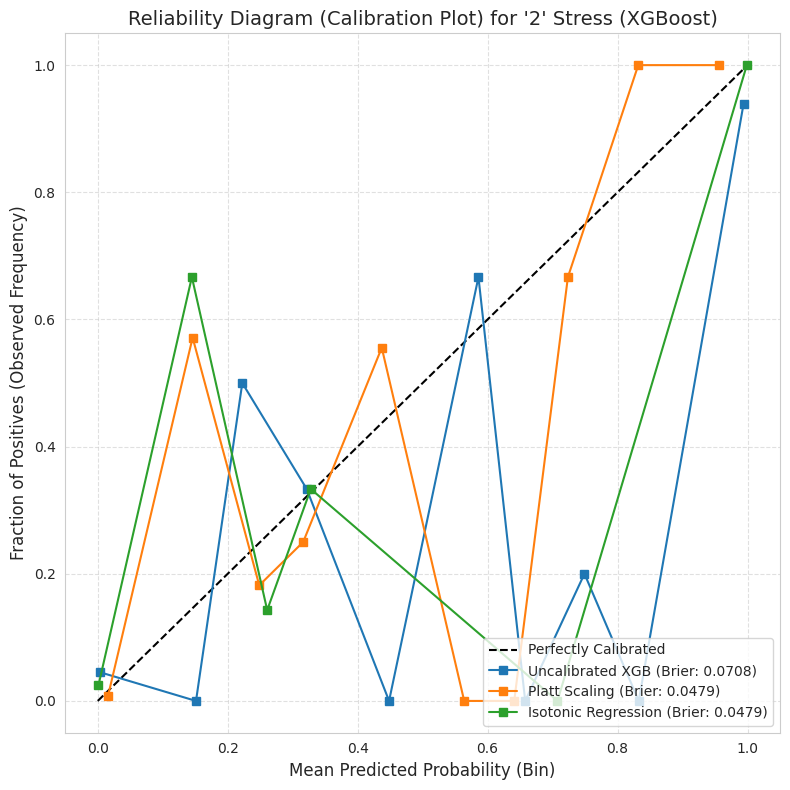

In [77]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# --- 1. Define the Class of Interest for Visualization ---
# Use the same class as before (e.g., '2' Stress, which is the last class)
target_class_index = len(classes_test) - 1 
target_class_label = classes_test[target_class_index]
y_test_target = (y_test == target_class_label).astype(int)

# --- 2. Organize Probabilities and Models for Plotting ---
models_xgb = {
    "Uncalibrated XGB (Brier: {:.4f})".format(brier_uncal): xgb_model,
    "Platt Scaling (Brier: {:.4f})".format(brier_platt): calibrated_platt_xgb,
    "Isotonic Regression (Brier: {:.4f})".format(brier_iso): calibrated_isotonic_xgb
}

probs_list = [probs_uncal[:, target_class_index], 
              probs_platt[:, target_class_index], 
              probs_iso[:, target_class_index]]
labels_list = list(models_xgb.keys())

# --- 3. Generate and Plot Reliability Diagram ---
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated") # Diagonal

for name, prob in zip(labels_list, probs_list):
    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_test_target, prob, n_bins=10
    )
    
    ax.plot(
        mean_predicted_value, 
        fraction_of_positives, 
        "s-", 
        label=name 
    )

# --- 4. Final Visualization Setup ---
ax.set_title(f"Reliability Diagram (Calibration Plot) for '{target_class_label}' Stress (XGBoost)", fontsize=14)
ax.set_xlabel("Mean Predicted Probability (Bin)", fontsize=12)
ax.set_ylabel("Fraction of Positives (Observed Frequency)", fontsize=12)
ax.legend(loc="lower right")
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [79]:
# Assuming you execute the evaluation code similar to the one provided before:
brier_uncal, _, probs_uncal = calculate_brier_auc(xgb_model, X_test, y_test, classes_test)
# brier_platt, _, probs_platt = calculate_brier_auc(calibrated_platt_xgb, X_test, y_test, classes_test)
brier_iso, _, probs_iso = calculate_brier_auc(calibrated_isotonic_xgb, X_test, y_test, classes_test)

print(f"\n--- XGBoost Brier Score Comparison (Test Set) ---")
print(f"Uncalibrated XGBoost: {brier_uncal:.4f}")
print(f"Platt-Calibrated XGBoost: {brier_platt:.4f}")
print(f"Isotonic-Calibrated XGBoost: {brier_iso:.4f}")

# You are looking for: brier_platt < brier_uncal AND brier_iso < brier_uncal


--- XGBoost Brier Score Comparison (Test Set) ---
Uncalibrated XGBoost: 0.2671
Platt-Calibrated XGBoost: 0.0479
Isotonic-Calibrated XGBoost: 0.2212
